## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


---
## Compute the camera calibration using chessboard images

First step in calculating camera matrix is using chessboard to acquire image points and obejct points

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# Chess board size
chessboard_size = (9, 6)

# Since we know object points, we can prepare them as (0, 0, 0), (1, 0, 0) ...
objp = np.zeros((chessboard_size[1] * chessboard_size[0], 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Prepare input arrays for cv2.calibrateCamera()
object_points = []
image_points = []

# Load all images from camera_cal folder
images = glob.glob('camera_cal/calibration*.jpg')

# Iterate through images and append image points for coresponding
for image in images:
    # Read image
    img = cv2.imread(image)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    # Check if found corners successfuly
    if ret is True:
        # Append detected corners alongisde coresponding objp
        object_points.append(objp)
        image_points.append(corners)

        # Display found corners as sanity check
        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        cv2.imshow('Corners', img)
        cv2.waitKey(200)
        cv2.destroyAllWindows()
    else:
        # Opencv findChessboardCorners fails for for calibration images 1, 4, 5
        # I guess the reason is missing whitespace around chessboard in those images
        
        # Note from opencv site:

        '''
        The function requires white space (like a square-thick border, the wider the better) around the board to make the detection more robust in various 
        environments. Otherwise, if there is no border and the background is dark, the outer black squares cannot be segmented properly and so the square 
        grouping and ordering algorithm fails.
        '''
        print("Failed to find chessbpard corners for", image)


Failed to find chessbpard corners for camera_cal/calibration4.jpg
Failed to find chessbpard corners for camera_cal/calibration5.jpg
Failed to find chessbpard corners for camera_cal/calibration1.jpg


After determining image points for coresponding object points, we can do the actual camera calibration and undistort image where finding of chessboard corners failed (camera_cal/calibration1.jpg)

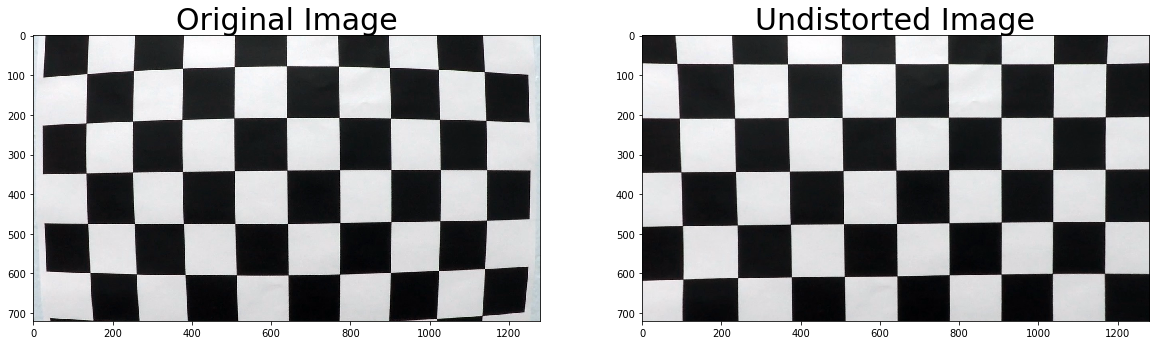

In [2]:
# Image to undistort
distorted_image = cv2.imread('camera_cal/calibration1.jpg')

# Acquire camera matrix and distortion coeffs
ret, mtx, dist_coef, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, (distorted_image.shape[1], distorted_image.shape[0]), None, None)

# Aplly undistortion on image
undistorted_image = cv2.undistort(distorted_image, mtx, dist_coef, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(distorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)
plt.savefig('output_images/undistort_output.jpg')


We can also save camera matrix and distortion coeffs for later usage

In [3]:
import pickle

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist_coef
pickle.dump(dist_pickle, open("calibration_output/wide_dist_pickle.p", "wb"))